# Проверка гипотез по увеличению выручки в интернет-магазине

**Описание проекта:** 

В нашем распоряжении данные интернет-магазине. Наша задача проверить ряд гипотез, при которых интернет-магазин сможет увеличить свою выручку. Для этого нам необходимо  приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Для обзора данных воспользуемся методами head(), info() и describe().

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
display(hypothesis.head(10))
display(hypothesis.info())
hypothesis.describe()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [3]:
orders = pd.read_csv('orders.csv')
display(orders.head())
display(orders.info())
orders['revenue'].describe()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [4]:
visitors = pd.read_csv('visitors.csv')
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод:** 

В данных встречаются следующие проблем:

* Местами указан некорректный тип данных;
* Разные регистры в названиях колонок;
* Возможно присутствуют дубликаты.

Это только первоначальные наблюдения. Проведем подробную предобработку данных, чтобы выявить все аномалии.

## Шаг 2. Предобработка данных

1. Изменим типы данных в необходимых колонках.

In [5]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [6]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

2. Приведем названия колонок к нижнему регистру.

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.rename(columns = {'Hypothesis': 'hypothesis','Reach' : 'reach', 'Impact' : 'impact', 
                             'Confidence' : 'confidence', 'Efforts' : 'efforts'}, inplace = True)
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

3. Проверим таблицы на наличие дубликатов.

In [8]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())
display(hypothesis.duplicated().sum())

0

0

0

Данные подготовлены к анализу.

## Шаг 2. Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез. Результат отсортируем по убыванию приоритета. 

In [9]:
# для того, чтобы гипотезы отобразились целиком используем параметр: 

pd.options.display.max_colwidth = 120 

In [10]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE это гипотезы с индексами 8, 0, 7, 6, 2

Применим фреймворк RICE для приоритизации гипотез. Результат отсортируем по убыванию приоритета. 

In [11]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
pd.options.display.max_colwidth = 120
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по ICE это гипотезы с индексами 7, 2, 0, 6, 8.

**Вывод**:
Мы подсчитали ICE и RICE для 9 гипотез. В обоих случаях наиболее перспективными стали гипотезы с индексами 0, 2, 6, 7, 8. Однако при подсчете ICE на первом месте оказалась гипотеза 9, а при подсчете RICE на первое место вышла гипотеза 8. Это произошло из-за того, что параметр reach (количество пользователей которых затронет изменения) у гипотезы 8 больше, чем у других гипотез (10 против 8, 3, 5 и 1). 

## Шаг 3. Анализ A/B-теста

Перед началом анализа обозначим важные факты:
* В тесте участвуют 2 группы - A и B;
* Дата начала теста - 2019-08-01, дата окончания теста - 2019-08-31;
* В группе А участвуют 31 пользователь, в группе В их 30;
* В таблице есть пользователи попавшие в обе группы. 

Определим пользователей входящих в обе группы. 

In [12]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId']

2          8300375
44       199603092
51       232979603
55       237748145
66       276558944
84       351125977
97       393266494
114      457167155
119      471551937
122      477780734
192      818047933
236      963407295
299     1230306981
311     1294878855
316     1316129916
318     1333886533
340     1404934699
386     1602967004
393     1614305549
402     1648269707
406     1668030113
422     1738359350
436     1801183820
469     1959144690
487     2038680547
491     2044997962
569     2378935119
591     2458001652
614     2579882178
619     2587333274
622     2600415354
639     2654030115
648     2686716486
661     2712142231
662     2716752286
677     2780786433
710     2927087541
715     2949041841
718     2954449915
744     3062433592
784     3202540741
792     3234906277
884     3656415546
897     3717692402
909     3766097110
917     3803269165
932     3891541246
950     3941795274
954     3951559397
957     3957174400
958     3963646447
960     3972127743
963     3984

Перед проведением анализа A/B-теста необходимо собрать кумулятивные данные. Для начала создадим массив уникальных пар значений дат и групп теста. 

In [13]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head(6)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B


Объявим переменную ordersAggregated. Она будет содержать агрегированные кумулятивные по дням данные о заказах. 

In [14]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), 
    axis=1).sort_values(by=['date', 'group'])

In [15]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Таким же образом объявим еще одну переменную, содержащую агрегированные кумулятивные по дням данные о посетителях интернет-магазина. Назовет эту переменную visitorsAggregated. 

In [16]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [17]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединяем кумулятивные данные в одной общей таблице, назовем ее cumulativeData. Для удобства присвоим ее столбцам понятные названия. 

In [18]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [19]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Мы собрали кумулятивные данные. 

**1. Построим график кумулятивной выручки по группам.**

Создадим два датафрейма в которых сохраним кумулятивное количество заказов и кумулятивную выручку по дням по двум группам A и B. Назовем их cumulativeRevenueA и cumulativeRevenueB. 

In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Можем приступить к построению графика выручки для группы A и группы B.

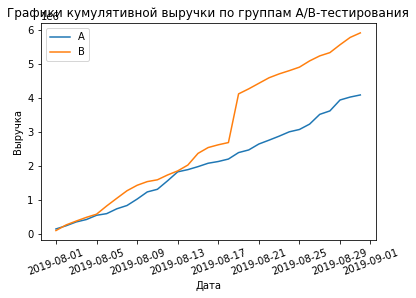

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

plt.title('Графики кумулятивной выручки по группам A/B-тестирования')
plt.xlabel("Дата")
plt.ylabel("Выручка")

plt.xticks(rotation=20) 

plt.show()

**Вывод:** Из полученного графика видно, что часть времени выручка почти равномерно увеличивается. Однако график выручки для группы B в какой-то момент резко растет. Это могут быть выбросы. 

**2. Построим график кумулятивного среднего чека по группам.**

Для построения такого графика разделим кумулятивную выручку на кумулятивное число заказов. 

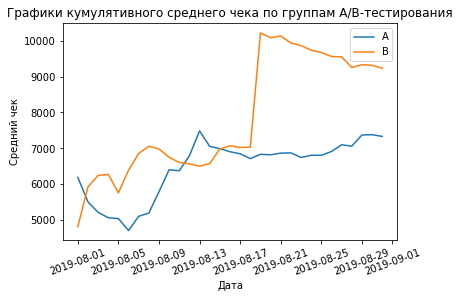

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Графики кумулятивного среднего чека по группам A/B-тестирования')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.xticks(rotation=20) 

plt.legend()

**Вывод:** Средний чек для группы B также неравномерен. Возможными причинами появления выбросов --  аномально крупные заказы. Средний чек для группы A становится более-менее равномерным начиная примерно с половины исследования. 

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

Создадим новый датафрейм mergedCumulativeRevenue и внесем в него данные по двум группам. 

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [24]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Построим отношение средних чеков. Воспользуемся методом axhline(). 

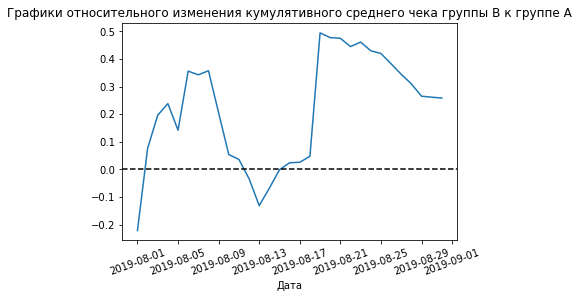

In [25]:
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Графики относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.xticks(rotation=20)

plt.axhline(y=0, color='black', linestyle='--')

**Вывод:** На графике видно, что в некоторых точках он имеет резкие подъемы. Это однозначно говорит о выбросах. 

**4. Построим график кумулятивной конверсии по группам.**

Добавим в датафрейм cumulativeData столбец conversion c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделим данные группы A от группы B. 

In [27]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Для построения графика воспользуемся методом plt.axis(). Передадим ему минимальное и максимальное значения оси x и, минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0, 0.015]

(18109.0, 18139.0, 0.0, 0.05)

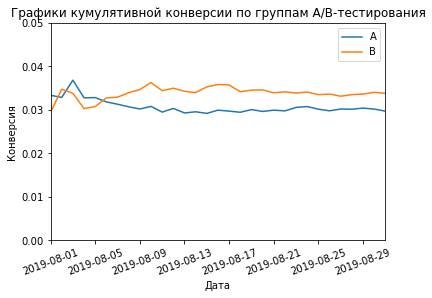

In [28]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Графики кумулятивной конверсии по группам A/B-тестирования')
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.xticks(rotation=20) 

plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

**Вывод:** По полученному графику видно, что вначале конверсия сегмента A была выше конверсии сегмента B. Но, довольно быстро сегмент B выровнялся и зафиксировался примерно около одного значения. Сегмент A также довольно быстро зафиксировался примерно около одного значения, но ниже сегмента B.

**5. Построим график относительного изменения кумулятивной конверсии группы B к группе A.**

Создадим новый датафрейм mergedCumulativeConversions и объединим в нем необходимые данные из cumulativeDataA и cumulativeDataB.

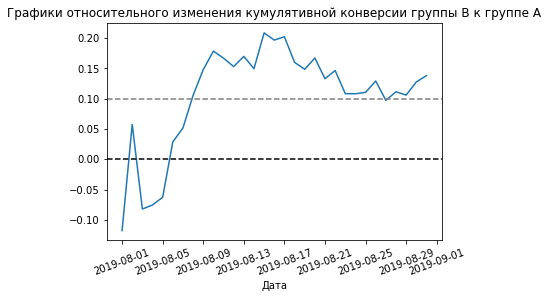

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Графики относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel("Дата")
plt.xticks(rotation=20) 

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.show()

**Вывод**: Почти с самого начала группа B лидировала по сравнению с группой A. Конверсия группы B начала падать, но к концу исследования постепенно начала расти. 

**6. Построим точечный график количества заказов по пользователям.**

Для начала найдите число заказов по пользователям. Для этого необходимо создать новый датафрейм orders_users с двумя столбцами visitorId (идентификатор пользователя) и transactionId (идентификатор заказа). 

In [30]:
orders_users = (orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique',}))
orders_users.columns = ['userId', 'orders']
orders_users.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Мы получили число заказов по пользователям. Можем перейти к визуализации. 

Text(0, 0.5, 'Стоимость')

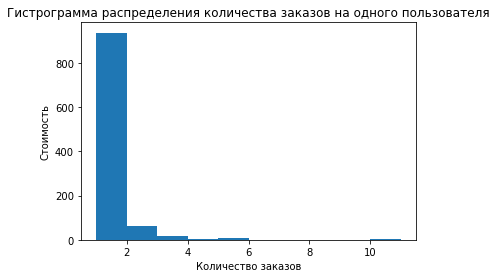

In [31]:
plt.hist(orders_users['orders'])

plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость")

Большинство пользователей совершают 1 заказ. Однако есть пользователи, которые совершают больше заказов. Для того чтобы узнать сколько таких пользователей, построим точечный график.

Text(0, 0.5, 'Стоимость')

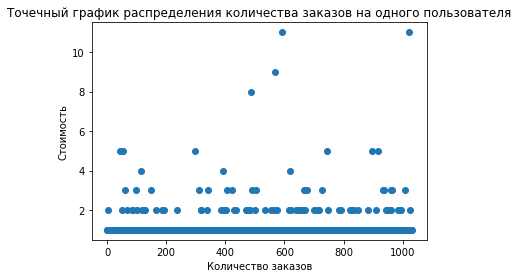

In [32]:
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values, orders_users['orders'])

plt.title('Точечный график распределения количества заказов на одного пользователя')
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость")

**Вывод:** График показал, что встречаются пользователи, совершившие 5, 8 и даже 12 заказов, однако это случается крайне редко, в связи с чем можем назвать их аномалиями. Чаще всего пользователи оформляют 1-2 заказа. Чтобы понять 2 заказа это много или мало, нам необходимо посчитать выборочные перцентили. 

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.**

Для подсчёта перцентилей применим метод percentile(). 

In [33]:
np.percentile(orders_users['orders'], [95, 99])

array([2., 4.])

**Вывод:** Только 5% пользователей заказываю больше 2 заказов, и всего 1% пользователей заказывают больше 4 заказов. 

**8. Построим точечный график стоимостей заказов.**

Посмотрим на распределение стоимостей заказов. 

In [34]:
display(orders.sort_values(by='revenue', ascending=False).head(10)) 

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Среди выведенных 10 строк цены варьируются от 65710 до 93940. Однако встречаются 2 особо дорогих заказа на суммы 202740 и 1294500. Такие аномально дорогие заказы искажают результат и делают победителем ту группу, где оказались.

Посмотрим на гистограмму распределения стоимостей заказов.

Text(0, 0.5, 'Количество заказов')

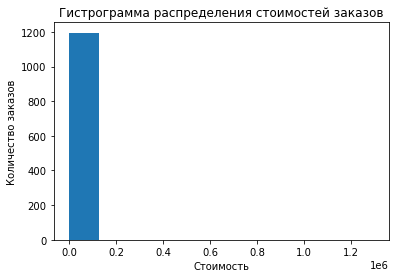

In [35]:
plt.hist(orders['revenue'])

plt.title('Гистрограмма распределения стоимостей заказов')
plt.xlabel("Стоимость")
plt.ylabel("Количество заказов")

Сумма большинства заказов меньше 200 000 рублей. Построим точечный график для более тщательной визуализации распространения стоимостей заказов.

Text(0, 0.5, 'Стоимость')

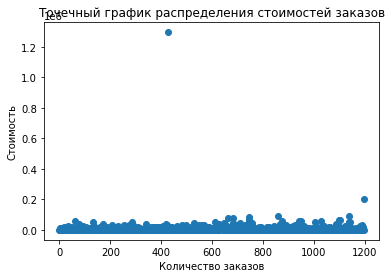

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title('Точечный график распределения стоимостей заказов')
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость")

Из-за одного явного выброса все значения слились в одну прямую. Для получения более визуально понятного результата построим еще один график без учета выброса.

Text(0, 0.5, 'Стоимость')

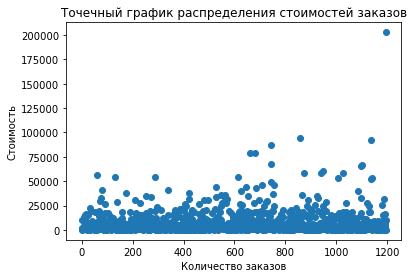

In [37]:
orders_new = orders[orders['revenue'] != 1294500]

x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue']) 

plt.title('Точечный график распределения стоимостей заказов')
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость")

**Вывод**: Точечный график подтвердил наше предположение об аномалиях. На графике видны 2 аномально дорогих заказа. Остальные же не выходят за рамки 100 000. 

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов.**

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** Только 5% пользователей совершают заказ дороже 28 000, и всего 1% пользователей совершают заказ дороже 58 233. В качестве границы аномалий будем брать заказы дороже 28 000. 

**10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.**

Сформируем нулевую и альтернативную гипотезы: 
* Нулевая гипотеза: различий в среднем количестве заказов между группами нет;
* Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

Подготовим данные. Создадим 2 новых датафрейма visitorsADaily и visitorsBDaily для группы A и группы B. Сохраним в них данные по дате и количестве пользователей. После, создадим 2 датафрейма visitorsACummulative и visitorsBCummulative в которых сохраним кумулятивные данные. Для удобства переименуем столбцы.  

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Проведем те же манипуляции с таблицей orders. 

In [40]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Объединим все датафреймы в один. Присвоим ему название total_data. 

In [41]:
total_data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

total_data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Объявим переменные sampleA и sampleB, в которых будут отображаться пользователи и их число заказов. У пользователей без заказов будут нули.  

In [42]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(total_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(total_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Посчитаем статистическую значимость.

In [43]:
display('p-value: ' "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


display('Относительный прирост среднего группы B по отношению к группе A: '
    "{0:.3f}".format(
        (total_data['ordersPerDateB'].sum() / total_data['visitorsPerDateB'].sum())
        / (total_data['ordersPerDateA'].sum() / total_data['visitorsPerDateA'].sum())
        - 1
    )
)

'p-value: 0.01679'

'Относительный прирост среднего группы B по отношению к группе A: 0.138'

**Вывод:** Проанализировав "сырые данные" по различиям в конверсии между группами выяснили, что: p-value меньше 5%, в связи с чем принимаем решение отвергнуть нулевую гипотезу. Анализ показал, что между группами есть статистическая значимость. Относительный прирост среднего группы B по отношению к группе A составило почти 14%. 

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Определим нулевую и альтернативную гипотезы: 
* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть.

Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным.  

In [44]:
display('p-value: ' '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('Относительное различие среднего чека между группами: ' '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-value: 0.729'

'Относительное различие среднего чека между группами: 0.259'

**Вывод:** Проанализировав "сырые данные" различий в среднем чеке заказа между группами мы выяснили, что p-value больше 0.05 (0.729). Это означает, что статистически значимых отличий в среднем чеке между группами нет, следовательно, нулевую гипотезу мы не отвергаем. Относительное различие среднего чека между группами составило почти 26%.

**12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.**

Чтобы посчитать статистическую значимость по очищенным данным, для начала нам нужно избавиться от аномалий.

Рассчитав 95-й и 99-й перцентили нам стали известны выбивающиеся из общего массива заказы. Примем за аномальных пользователей тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 28 000 рублей.

Создадим 2 датафрейма, в которых сохраним пользователей с числом заказов больше 2 (many_orders), и пользователей, совершивших заказы дороже 28 000 (expensive_orders). Объединим всех аномальных пользователей в одну общую таблицу - not_normal_users, и удалим их.

In [45]:
many_orders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
expensive_orders = orders[orders['revenue'] > 28000]['visitorId']
not_normal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Теперь можно приступить к расчету статистическую значимость различий в конверсии между группами по "очищенным" данным. Создадим 2 датафрейма в которых сохраним очищенные данные.

In [46]:
filtered_A_group = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(not_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                total_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

filtered_B_group = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(not_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                total_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


display('p-value: ' '{0:.5f}'.format(stats.mannwhitneyu(filtered_A_group, filtered_B_group)[1]))
display('Относительный прирост среднего группы B по отношению к группе A: ' '{0:.3f}'.format(
    filtered_B_group.mean()/filtered_A_group.mean()-1))

'p-value: 0.01304'

'Относительный прирост среднего группы B по отношению к группе A: 0.173'

**Вывод:** Проанализировав "очищенные данные" по различиям в конверсии между группами выяснили, что результаты практически не отличаются. p-value также меньше 5%, в связи с чем принимаем решение отвергнуть нулевую гипотезу. Анализ показал, что между группами есть статистическая значимость. Сегмент В лучше сегмента А. 

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [47]:
display('p-value: ' 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(not_normal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(not_normal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

display('Относительное различие среднего чека между группами: ' 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(not_normal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(not_normal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'p-value: 0.738'

'Относительное различие среднего чека между группами: -0.020'

**Вывод:** Проанализировав "очищенные данные" различий в среднем чеке заказа между группами мы выяснили, что p-value остался практически без изменений, он также больше 0.05. Следовательно, статистически значимых отличий в среднем чеке между группами нет, нулевую гипотезу мы не отвергаем. Однако разница между сегментами сократилась с 25% до 2%. 

## Шаг 4. Общий вывод

В нашем распоряжении данные интернет-магазине. Нашей задачей было проверить ряд гипотез, при которых интернет-магазин сможет увеличить свою выручку. Мы провели предобработку данных: изменили типы данных и названия колонок, проверили на наличие дубликатов. Мы приоритизировали гипотезы, запустили A/B-тест и проанализировали результаты. 

По проведенному анализу можно определить следующие факты:
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий;
* По сырым и очищенным данным статистически значимых отличий в среднем чеке между группами нет. Однако после удаления аномалий разница между сегментами сократилась с 25% до 2%;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: конверсия группы B падала и поднималась, но ближе к концу анализа она начала расти вверх;
* График различия среднего чека натолкнул на мысль об аномалиях: график колебался, имел резкие подъемы и резкие падения. 

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В крайне мала. 